In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from glob import glob
import os
import math
import sys
sys.path.insert(0,r"C:\Program Files\xraylib 64-bit\Python")
import xraylib
import scipy.signal 
from glob import glob
import scipy.integrate as spint


In [2]:
def absorb(E, material, s, r): 
    """
    This function calculate the intensity of the radiation given absorption.
    
    :param E: voltage x-ray tube
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    """
    A = np.exp(-xraylib.CS_Total_CP(material, E)*r*s)
    return A


In [3]:
def func(E, Ek):
    

    z=42 # порядковый номер элемента анода(молибден)
    res = z*Ek*Ek/12.39/12.39*E*E*(Ek/12.39-1/12.39*E)
    return res

In [4]:
def absfunc(E, Ek, material1, material2, s1, s2, r1, r2):
    
    """
    This function calculate the intensity of the radiation given absorption.
    
    :param E: voltage x-ray tube
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    """
    
    z=42 # порядковый номер элемента анода(молибден)
    res = z*Ek*Ek/12.39/12.39*E*E*(Ek/12.39-1/12.39*E)*np.exp(-xraylib.CS_Total_CP(material1, E)*r1*s1)*np.exp(-xraylib.CS_Total_CP(material2, E)*r2*s2)
    return res

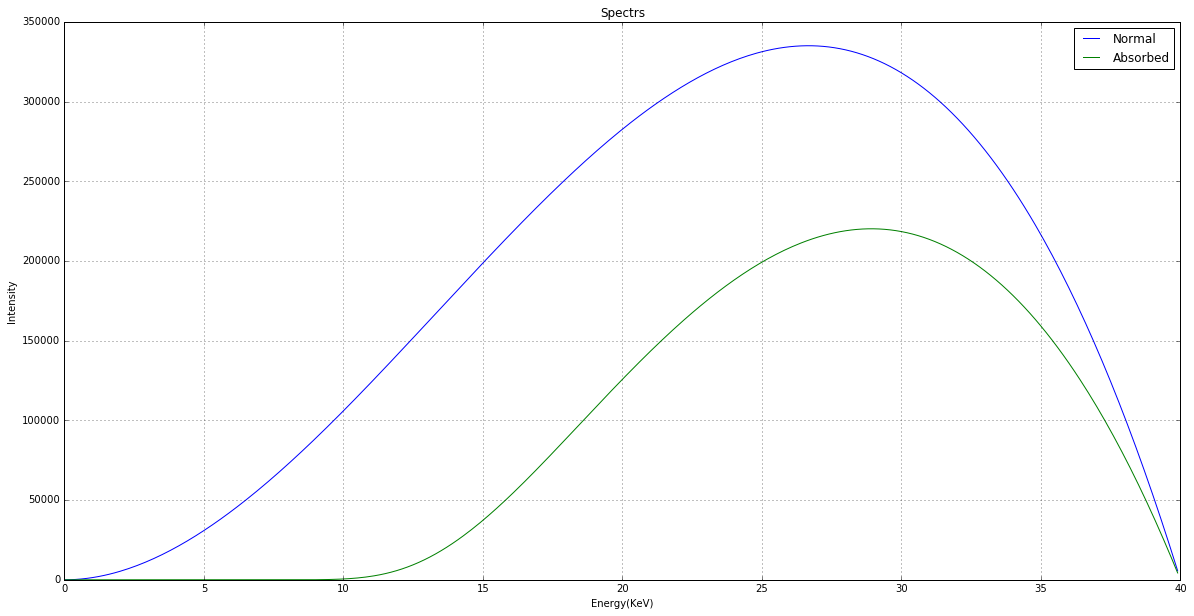

In [5]:
Ekr = 40 #np.arange(10, 100, 10)

plt.figure(figsize=(20,10))
E = np.arange(0, Ekr, 0.1)
Etemp = []
Ea = []
j =0

while j < (Ekr/0.1):
    Etemp.append(func(E[j], Ekr)) 
    Ea.append(func(E[j], Ekr)*absorb(E[j], 'H2O', 1, 1)) 
    j = j + 1
plt.hold(True)
plt.plot(E, Etemp, label='Normal')
plt.plot(E, Ea, label='Absorbed')
plt.grid(True)
plt.legend(loc=0)
plt.title('Spectrs')
plt.xlabel('Energy(KeV)')
plt.ylabel('Intensity')

C:\Users\AG\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in true_divide
C:\Users\AG\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


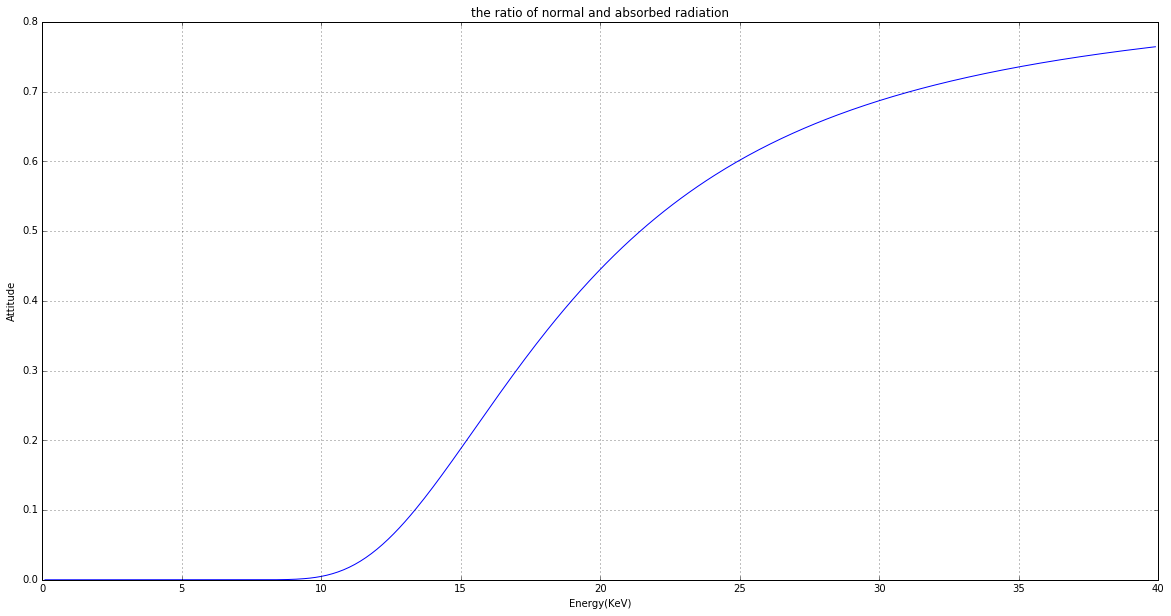

In [6]:
plt.figure(figsize=(20,10))

Eo = []


Eo = np.asarray(Ea)/np.asarray(Etemp) 


plt.hold(True)
plt.plot(E, Eo)
plt.grid(True)
plt.legend(loc=0)
plt.title('the ratio of normal and absorbed radiation')
plt.xlabel('Energy(KeV)')
plt.ylabel('Attitude')

In [7]:
E = 2./3*Ekr
t0 = 1/5*0.009
t = 0
m = 360 
n = 240


Mas = [[func(E,Ekr)] * m for j in range(n)]

for j in range(0, n, 1):
    for i in range(0, m, 1):
        if i>=130 and i<=180:
            t = 0.02*np.sqrt(2500 - (50 - i + 130)**2)
            Mas[j][i] = func(E,Ekr)*absorb(E, 'H2O', t, 1)
        elif i>180 and i<=230:
            t = 0.02*np.sqrt(2500 - (i - 180)**2)
            Mas[j][i] = func(E,Ekr)*absorb(E, 'H2O', t, 1)
            
for j in range(0, n, 1):
    for i in range(0, m, 1):
        if i>=118 and i<=180:
            t = 0.02*np.sqrt(3844 - (62 - i + 118)**2)
            if i>=130 and i<=180:
                t = t - 0.02*np.sqrt(2500 - (50 - i + 130)**2)
            Mas[j][i] = Mas[j][i]*absorb(E, 'C3H6', t, 0.91)
        if i>180 and i<=242:
            t = 0.02*np.sqrt(3844 - (i - 180)**2)
            if i>180 and i<=230:
                t = t - 0.02*np.sqrt(2500 - (i - 180)**2)
            Mas[j][i] = Mas[j][i]*absorb(E, 'C3H6', t, 0.91)
            

In [ ]:
E = 2./3*Ekr
t0 = 1/5*0.009
t = 0
t1 =0
m = 360 
n = 240
temp = spint.quad(absfunc, 0, Ekr, args=(Ekr, 'H2O', 'C3H6', 0, 0, 1, 0.91))

MasPoli = [[temp[0]] * m for j in range(n)]
            
for j in range(0, n, 1):
    for i in range(0, m, 1):
        t1 = 0
        t = 0
        if i>=118 and i<=180:
            t = 0.02*np.sqrt(3844 - (62 - i + 118)**2)
            if i>=130 and i<=180:
                t = 0.02*np.sqrt(2500 - (50 - i + 130)**2)
                t1 = t1 - t
                temp = spint.quad(absfunc, 0, Ekr, args=(Ekr, 'H2O', 'C3H6', t1, t, 1, 0.91))
            MasPoli[j][i] = temp[0]
        if i>180 and i<=242:
            t = 0.02*np.sqrt(3844 - (i - 180)**2)
            if i>180 and i<=230:
                t = 0.02*np.sqrt(2500 - (i - 180)**2)
                t1 = t1 - t
                temp = spint.quad(absfunc, 0, Ekr, args=(Ekr, 'H2O', 'C3H6', t1, t, 1, 0.91))
            MasPoli[j][i] = temp[0]
            

C:\Users\AG\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in exp
C:\Users\AG\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\AG\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:357: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Users\AG\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in double_scalars


In [ ]:

plt.figure(figsize=(10,10))
plt.imshow(MasPoli, cmap=plt.cm.Greys)
plt.colorbar()
plt.show()

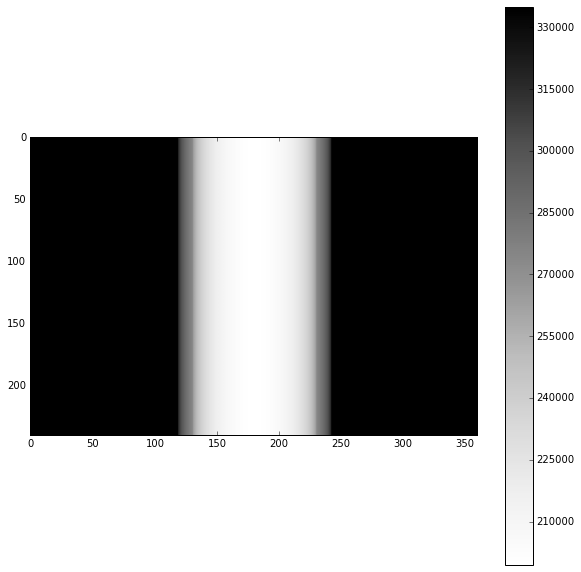

In [7]:

plt.figure(figsize=(10,10))
plt.imshow(Mas, cmap=plt.cm.Greys)
plt.colorbar()
plt.show()

C:\Users\AG\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


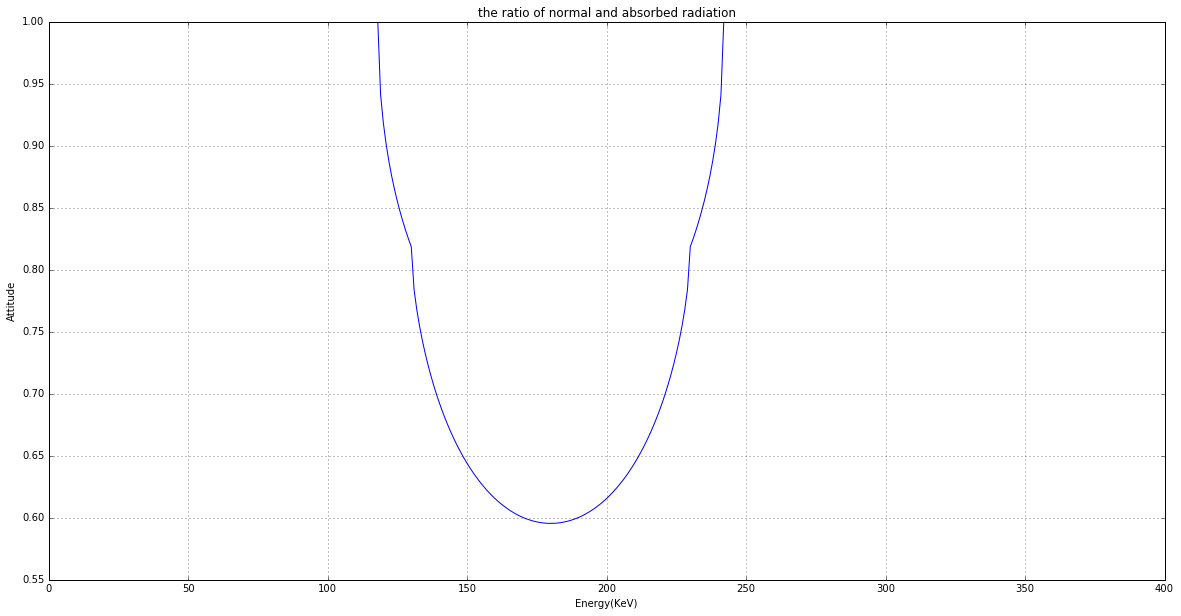

In [8]:
# монохроматика
plt.figure(figsize=(20,10))

j = 5
Teor = []
l = []

for i in range(0, m, 1):
    Teor.append(Mas[j][i]/Mas[j][0])
    l.append(i)


plt.hold(True)
plt.plot(l, Teor)
plt.grid(True)
plt.legend(loc=0)
plt.title('the ratio of normal and absorbed radiation')
#plt.xlabel('Energy(KeV)')
plt.ylabel('Attitude')

In [ ]:
# полихроматика
plt.figure(figsize=(20,10))

j = 5
TeorPoli = []
l = []

for i in range(0, m, 1):
    TeorPoli.append(MasPoli[j][i]/MasPoli[j][0])


plt.hold(True)
plt.plot(TeorPoli)
plt.grid(True)
plt.legend(loc=0)
plt.title('the ratio of normal and absorbed radiation')
#plt.xlabel('Energy(KeV)')
plt.ylabel('Attitude')

In [9]:
#A = glob('C:\Users\Art\Downloads\contr\data*.txt')
#A1 = glob('C:\Users\Art\Downloads\contr\empty*.txt')
A = glob('data*.txt')

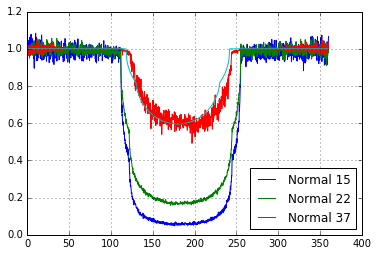

In [10]:
plt.figure(figsize=(20,10))
plt.hold(True)
plt.grid(True)

tmp = 360./3000
width = []

for i in range(1, 3001, 1):
    width.append(tmp*i)

for AA in [A[0], A[7], A[14]]:
    AAA = np.loadtxt(AA)
    cut_data = AAA[AAA.shape[0]//2]
    cut_data = scipy.signal.medfilt(cut_data, kernel_size=3)
    AA = AA.replace("data","empty")
    AAA = np.loadtxt(AA)
    cut_empty = AAA[AAA.shape[0]//2]
    cut_empty = scipy.signal.medfilt(cut_empty, kernel_size=3)
    AA = AA.replace("empty", "dark")
    AAA = np.loadtxt(AA)
    cut_dark = AAA[AAA.shape[0]//2]
    cut_dark = scipy.signal.medfilt(cut_dark, kernel_size=3)
    plt.plot(width, (cut_data - cut_dark)/(cut_empty - cut_dark), label = 'Normal ' + AA[-9:-7])

plt.plot(Teor, label = 'Teor ' + Ekr)
plt.legend(loc=0)
#plt.title('Spectrs')
#plt.xlabel('Energy(KeV)')
#plt.ylabel('Intensity')

In [28]:
print(spint.quad(absfunc, 0, Ekr, args=(Ekr, 'H2O', 0, 1)))
print(spint.quad(absfunc, 0, Ekr, args=(Ekr, 'H2O', 1, 1)))
print(Ekr, E)

(7537270.006029853, 8.368050703510935e-08)
(3791239.2991691856, 0.0003934385687908389)
40 26.666666666666664


In [36]:
print(MasPoli)


[[(7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.368050703510935e-08), (7537270.006029853, 8.36805070